In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from scipy.stats import linregress

from sklearn import datasets

In [3]:
file = "Merged/merged_data.csv"
df = pd.read_csv(file)
df

,Month,GDP (million),Percent GDP,CPI,Percent CPI,Commodity Index,Seasonally adjusted unemployment (%),Owner Occ. Hsing Dbt / Inc,Interest Rates (%pa),Cash Rate (%),AUD/USD exchange rate
0,Jun-1922,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sep-1922,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dec-1922,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mar-1923,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jun-1923,NaN,NaN,2.8,2.3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
401,Sep-2022,553036.0,5.9,128.4,7.3,114.8,3.6,109.1,6.80,2.21,0.6502
402,Dec-2022,555690.0,2.7,130.8,7.8,107.9,3.5,108.8,7.55,3.01,0.6775
403,Mar-2023,NaN,NaN,NaN,NaN,106.2,NaN,NaN,NaN,3.51,0.6712
404,Jun-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Month', 'GDP (million)', 'Percent GDP', 'CPI', 'Percent CPI',
       'Commodity Index', 'Seasonally adjusted unemployment (%)',
       'Owner Occ. Hsing Dbt / Inc', 'Interest Rates (%pa)', 'Cash Rate (%)',
       'AUD/USD exchange rate'],
      dtype='object')

In [8]:
cpi_df = df.loc[:, ["Month", "CPI", "Percent CPI", "Cash Rate (%)"]]
cpi_df

,Month,CPI,Percent CPI,Cash Rate (%)
0,Jun-1922,2.8,NaN,NaN
1,Sep-1922,2.8,NaN,NaN
2,Dec-1922,2.7,NaN,NaN
3,Mar-1923,2.7,NaN,NaN
4,Jun-1923,2.8,2.3,NaN
...,...,...,...,...
401,Sep-2022,128.4,7.3,2.21
402,Dec-2022,130.8,7.8,3.01
403,Mar-2023,NaN,NaN,3.51
404,Jun-2023,NaN,NaN,NaN


In [9]:
inter_cpi_df = cpi_df.loc[(cpi_df["Cash Rate (%)"] >= 0) & (cpi_df["CPI"] >= 0) & (cpi_df["Percent CPI"] >= 0)]
inter_cpi_df.head()

,Month,CPI,Percent CPI,Cash Rate (%)
216,Jun-1976,17.7,12.0,8.02
217,Sep-1976,18.1,13.8,7.46
218,Dec-1976,19.2,14.3,6.37
219,Mar-1977,19.6,13.3,7.58
220,Jun-1977,20.1,13.6,9.52


In [17]:
# Get column for Percent CPI
cpi = inter_cpi_df["Percent CPI"]
#commodity_index

In [18]:
# Get column for Cash rate
cash_rate = inter_cpi_df["Cash Rate (%)"]

In [19]:
# Get column for Month and store as X_Axis variable for plotting
x_axis = inter_cpi_df["Month"]
x_axis

216    Jun-1976
217    Sep-1976
218    Dec-1976
219    Mar-1977
220    Jun-1977
         ...   
398    Dec-2021
399    Mar-2022
400    Jun-2022
401    Sep-2022
402    Dec-2022
Name: Month, Length: 183, dtype: object

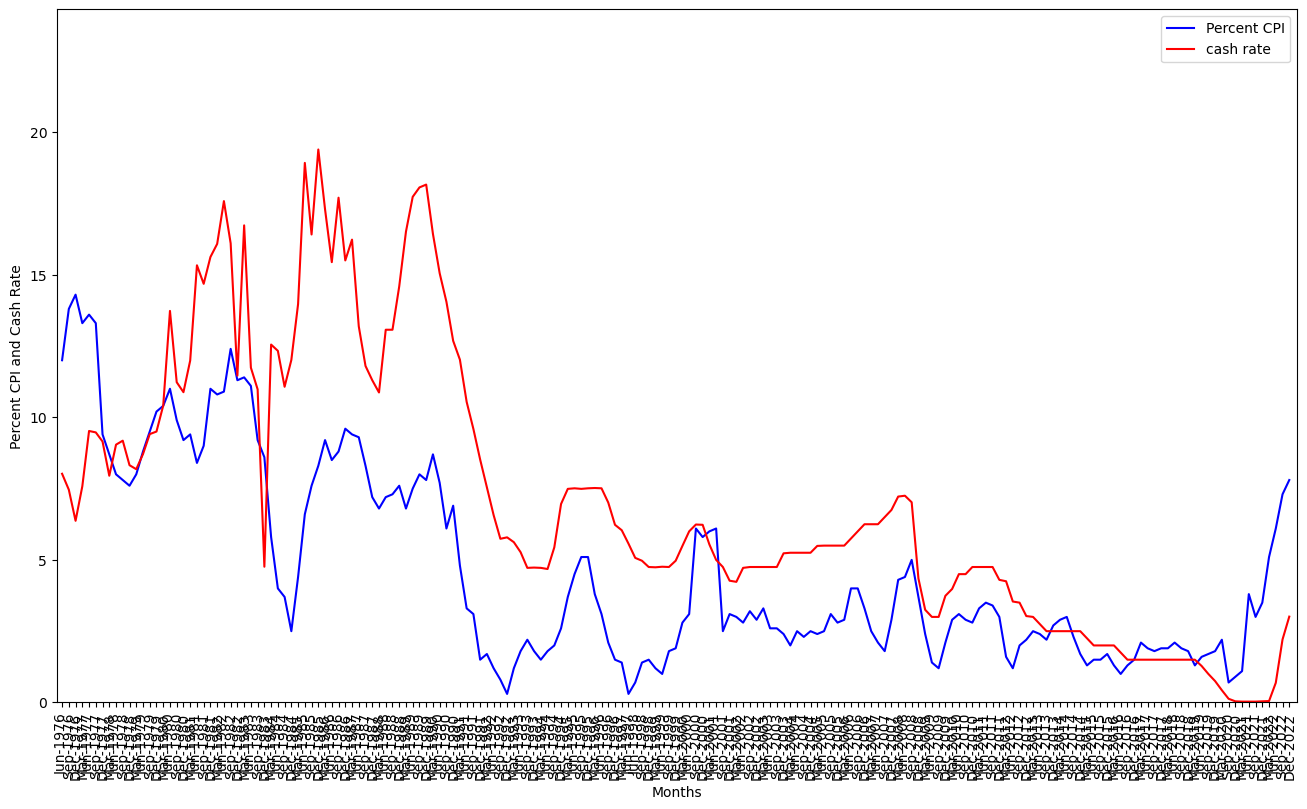

In [78]:
# PLot CPI and cash rate vs Month
plt.figure(figsize = (16,9))
cpi2, = plt.plot(x_axis, cpi, color = "blue", label = "Percent CPI")
cashrate = plt.plot(x_axis, cash_rate,  color = "red", label = "cash rate")
plt.legend(loc="best")
plt.xticks(inter_cpi_df["Month"], rotation="vertical")
plt.xlabel("Months")
plt.ylabel("Percent CPI and Cash Rate")
plt.xlim(-0.75, len(inter_cpi_df["Month"])+0.15)
plt.ylim(0, max(inter_cpi_df["Percent CPI"])+10)
plt.savefig("Output/Percent CPI and cash rate over time.png")
plt.show()


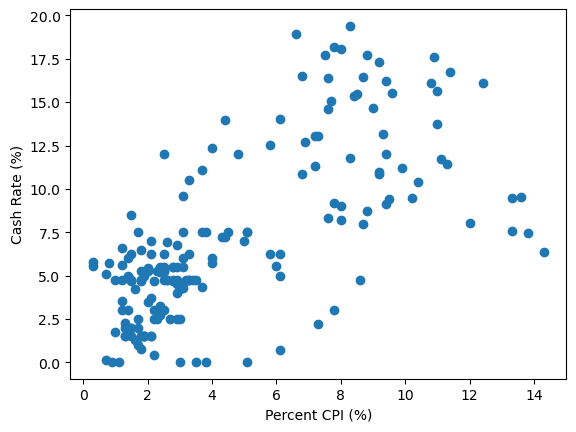

In [77]:
# Cash rate VS Percent CPI
plt.scatter(inter_cpi_df.iloc[:,2], inter_cpi_df.iloc[:,3])
plt.xlabel('Percent CPI (%)')
plt.ylabel('Cash Rate (%)')
plt.show()

In [46]:
inter_cpi_df.iloc[:,3]

216    8.02
217    7.46
218    6.37
219    7.58
220    9.52
       ... 
398    0.04
399    0.05
400    0.69
401    2.21
402    3.01
Name: Cash Rate (%), Length: 183, dtype: float64

In [79]:
#calculate correlation between Percent CPI and Cash rate
cpi2 = inter_cpi_df.iloc[:,2]
cash_rate = inter_cpi_df.iloc[:,3]
correlation = st.pearsonr(cpi2,cash_rate)
print(f'The correlation between Percent CPI and Cash Rate is {round(correlation[0],2)}')

The correlation between Percent CPI and Cash Rate is 0.69


In [1]:
#Print out the r-squared value along with the plot
x_values = inter_cpi_df["Percent CPI"]
y_values = inter_cpi_df["Cash Rate (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(90,1),fontsize = 15, color = "red")
plt.xlabel('Percent CPI (%)')
plt.ylabel('Cash Rate (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Output/Percent CPI vs cash rate over time correletion.png")

NameError: name 'inter_cpi_df' is not defined

In [50]:
inter_cpi_df.tail(15)

,Month,CPI,Percent CPI,Cash Rate (%)
387,Mar-2019,114.1,1.3,1.50
388,Jun-2019,114.8,1.6,1.28
389,Sep-2019,115.4,1.7,1.00
390,Dec-2019,116.2,1.8,0.75
391,Mar-2020,116.6,2.2,0.43
393,Sep-2020,116.2,0.7,0.13
394,Dec-2020,117.2,0.9,0.04
395,Mar-2021,117.9,1.1,0.03
396,Jun-2021,118.8,3.8,0.03
397,Sep-2021,119.7,3.0,0.03


In [86]:
# Remove 2021 data from dataframe
filtered_df = inter_cpi_df.iloc[:-8]

In [87]:
filtered_df.tail(15)

,Month,CPI,Percent CPI,Cash Rate (%)
379,Mar-2017,110.5,2.1,1.50
380,Jun-2017,110.7,1.9,1.50
381,Sep-2017,111.4,1.8,1.50
382,Dec-2017,112.1,1.9,1.50
383,Mar-2018,112.6,1.9,1.50
384,Jun-2018,113.0,2.1,1.50
385,Sep-2018,113.5,1.9,1.50
386,Dec-2018,114.1,1.8,1.50
387,Mar-2019,114.1,1.3,1.50
388,Jun-2019,114.8,1.6,1.28


In [90]:
cpi_no2021 = filtered_df["Percent CPI"]
cash_rate_no2021 = filtered_df["Cash Rate (%)"]
x_axis_no2021 = filtered_df["Month"]

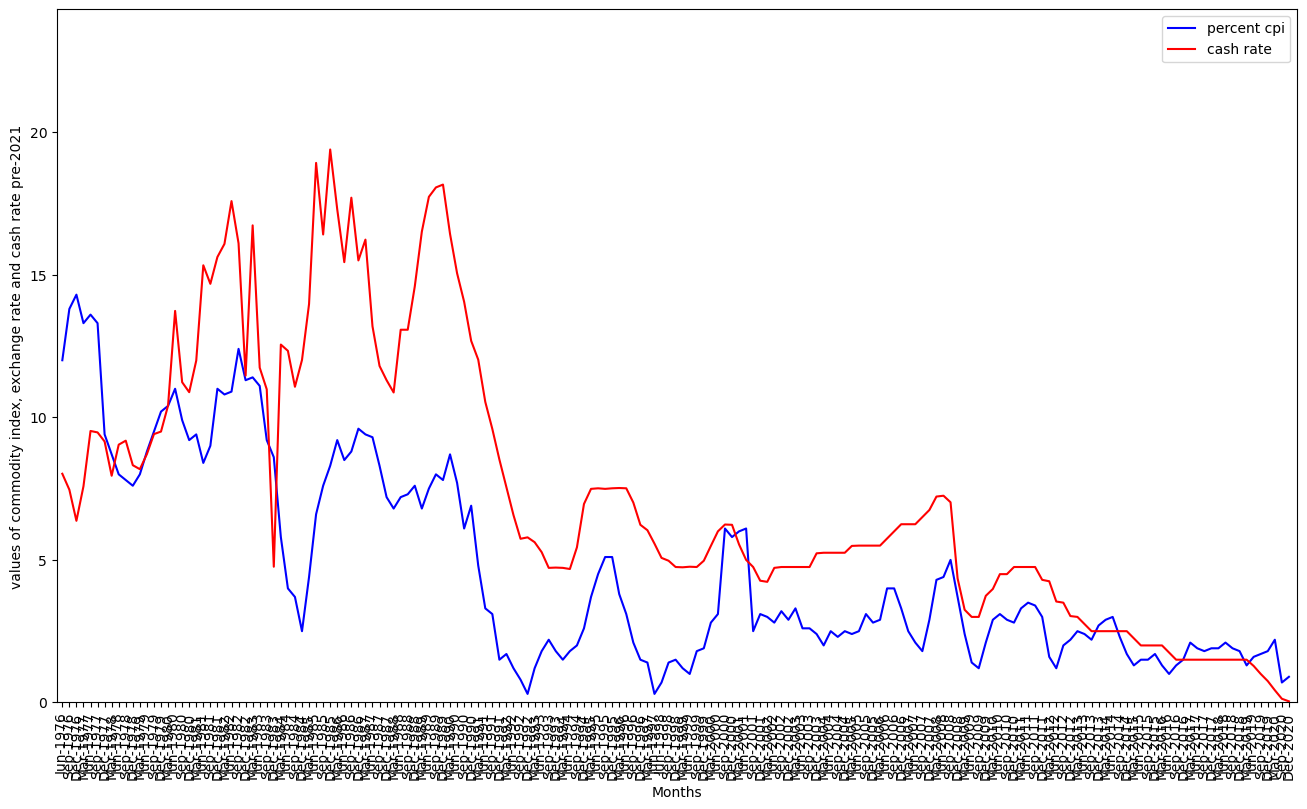

In [93]:
# Cash rate VS Percent CPI, pre-2021
plt.figure(figsize = (16,9))
cpi_rate_no2021, = plt.plot(x_axis_no2021, cpi_no2021, color = "blue", label = "percent cpi")
cashrate_no2021 = plt.plot(x_axis_no2021, cash_rate_no2021,  color = "red", label = "cash rate")
plt.legend(loc="best")
plt.xticks(filtered_df["Month"], rotation="vertical")
plt.xlabel("Months")
plt.ylabel("values of commodity index, exchange rate and cash rate pre-2021")
plt.xlim(-0.75, len(filtered_df["Month"])+0.15)
plt.ylim(0, max(filtered_df["Percent CPI"])+10)
plt.savefig("Output/Percent CPI and cash rate over time pre 2021.png")
plt.show()

In [100]:
#calculate correlation between Percent CPI and Cash rate
cpi_no2021 = filtered_df.iloc[:,2]
cash_rate_no2021 = filtered_df.iloc[:,3]
correlation_no2021 = st.pearsonr(cpi_no2021,cash_rate_no2021)
print(f'The correlation between Percent CPI and Cash Rate, pre-2021 is {round(correlation_no2021[0],2)}')


The correlation between Percent CPI and Cash Rate, pre-2021 is 0.72


The r-squared is: 0.5184803118129917


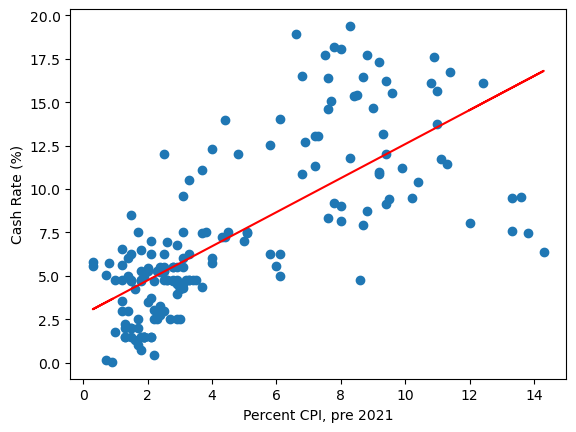

In [102]:
#Print out the r-squared value along with the plot
x_values_no2021 = filtered_df["Percent CPI"]
y_values_no2021 = filtered_df["Cash Rate (%)"]
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_values_no2021, y_values_no2021)
regress_values2 = x_values_no2021 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
plt.scatter(x_values_no2021, y_values_no2022)
plt.plot(x_values_no2021,regress_values2,"r-")
plt.annotate(line_eq2,(90,1),fontsize = 15, color = "red")
plt.xlabel('Percent CPI, pre 2021')
plt.ylabel('Cash Rate (%)')
print(f"The r-squared is: {rvalue2**2}")
plt.show()